Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       1.00      0.75      0.86       161

    accuracy                           0.96      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.96      0.96      1115



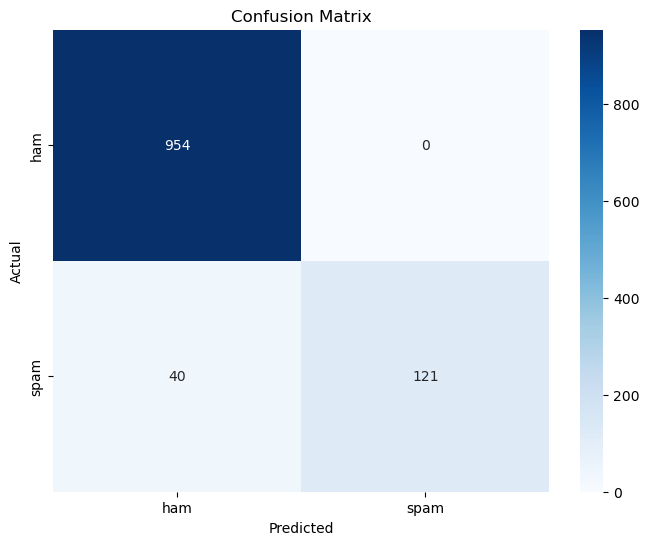

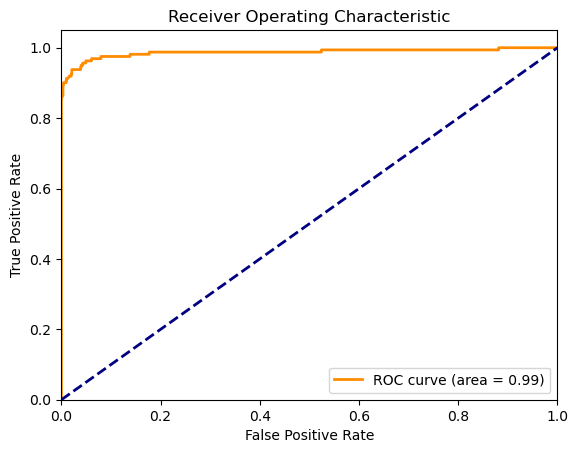

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

data = pd.read_csv('sms_spam.csv')

X = data['text']
y = data['type']

y = y.map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

y_pred = naive_bayes.predict(X_test_tfidf)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

fpr, tpr, _ = roc_curve(y_test, naive_bayes.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

plt.show()
